# Define DH parameters

In [2]:
from sympy import symbols, cos, sin, pi, simplify, sqrt, atan2
from sympy.matrices import Matrix
import numpy as np
from numpy import array
from IPython.display import Image

#Define DH param symbols
d1, d2, d3, d4, d5, d6, d7 = symbols('d1:8')
a0, a1, a2, a3, a4, a5, a6 = symbols('a0:7')
alpha0, alpha1, alpha2, alpha3, alpha4, alpha5, alpha6 = symbols('alpha0:7')

# Joint angle symbols
q1, q2, q3, q4, q5, q6, q7 = symbols('q1:8')



s = {alpha0:0,     a0:0,        d1:0.75,
     alpha1:-pi/2, a1:0.35,     d2:0,        q2:q2 - pi / 2,
     alpha2:0,     a2:1.25,     d3:0,
     alpha3:-pi/2, a3:-0.054,   d4:1.50,
     alpha4:pi/2,  a4:0,        d5:0,
     alpha5:-pi/2, a5:0,        d6:0,
     alpha6:0,     a6:0,        d7:0.303,    q7:0}

# Diagram reference to calculate DH parameters

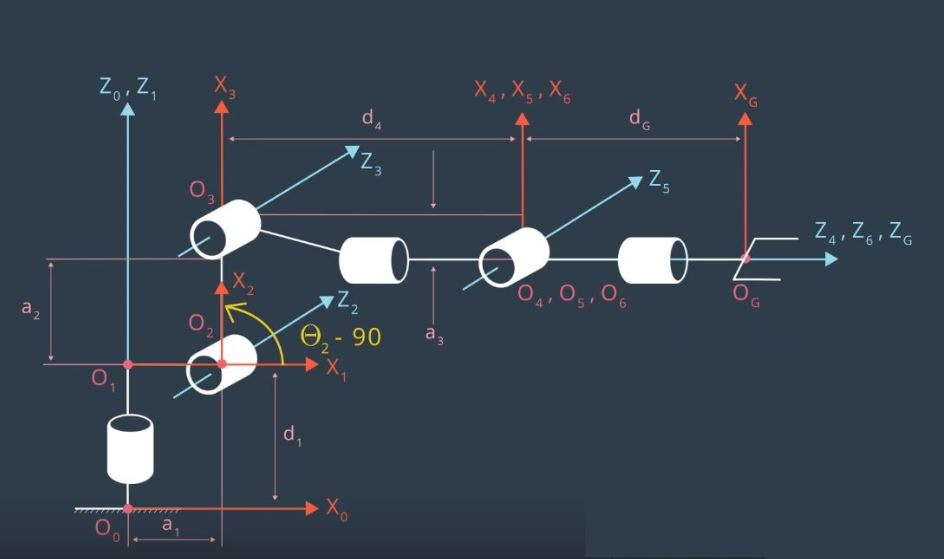

In [3]:
Image(filename='images/01-DH.jpg')

# Defining Generic DH Homogeneous Transformation matrics for each frame with respect to its previous

In [4]:
T0_1 = Matrix([[             cos(q1),            -sin(q1),            0,              a0 ],
               [ sin(q1)*cos(alpha0), cos(q1)*cos(alpha0), -sin(alpha0), -sin(alpha0)*d1 ],
               [ sin(q1)*sin(alpha0), cos(q1)*sin(alpha0),  cos(alpha0),  cos(alpha0)*d1 ],
               [                   0,                   0,            0,               1 ]])
T0_1 = T0_1.subs(s)

T1_2 = Matrix([[             cos(q2),            -sin(q2),            0,              a1 ],
               [ sin(q2)*cos(alpha1), cos(q1)*cos(alpha1), -sin(alpha1), -sin(alpha1)*d2 ],
               [ sin(q2)*sin(alpha1), cos(q1)*sin(alpha1),  cos(alpha1),  cos(alpha1)*d2 ],
               [                   0,                   0,            0,               1 ]])
T1_2 = T1_2.subs(s)

T2_3 = Matrix([[             cos(q3),            -sin(q3),            0,              a2 ],
               [ sin(q3)*cos(alpha2), cos(q2)*cos(alpha2), -sin(alpha2), -sin(alpha1)*d3 ],
               [ sin(q3)*sin(alpha2), cos(q2)*sin(alpha2),  cos(alpha2),  cos(alpha1)*d3 ],
               [                   0,                   0,            0,               1 ]])
T2_3 = T2_3.subs(s)

T3_4 = Matrix([[             cos(q4),            -sin(q4),            0,              a3 ],
               [ sin(q4)*cos(alpha3), cos(q3)*cos(alpha3), -sin(alpha3), -sin(alpha1)*d4 ],
               [ sin(q4)*sin(alpha3), cos(q3)*sin(alpha3),  cos(alpha3),  cos(alpha1)*d4 ],
               [                   0,                   0,            0,               1 ]])
T3_4 = T3_4.subs(s)

T4_5 = Matrix([[             cos(q5),            -sin(q5),            0,              a4 ],
               [ sin(q5)*cos(alpha4), cos(q4)*cos(alpha4), -sin(alpha4), -sin(alpha1)*d5 ],
               [ sin(q5)*sin(alpha4), cos(q4)*sin(alpha4),  cos(alpha4),  cos(alpha1)*d5 ],
               [                   0,                   0,            0,               1 ]])
T4_5 = T4_5.subs(s)

T5_6 = Matrix([[             cos(q6),            -sin(q6),            0,              a5 ],
               [ sin(q6)*cos(alpha5), cos(q5)*cos(alpha5), -sin(alpha5), -sin(alpha1)*d6 ],
               [ sin(q6)*sin(alpha5), cos(q5)*sin(alpha5),  cos(alpha5),  cos(alpha1)*d6 ],
               [                   0,                   0,            0,               1 ]])
T5_6 = T5_6.subs(s)

T6_G = Matrix([[             cos(q7),            -sin(q7),            0,              a6 ],
               [ sin(q7)*cos(alpha6), cos(q6)*cos(alpha6), -sin(alpha6), -sin(alpha1)*d7 ],
               [ sin(q7)*sin(alpha6), cos(q6)*sin(alpha6),  cos(alpha6),  cos(alpha1)*d7 ],
               [                   0,                   0,            0,               1 ]])
T6_G = T6_G.subs(s)

# Converting them to base frame

In [5]:
T0_2 = simplify(T0_1 * T1_2)
T0_3 = simplify(T0_2 * T2_3)
T0_4 = simplify(T0_3 * T3_4)
T0_5 = simplify(T0_4 * T4_5)
T0_6 = simplify(T0_5 * T5_6)
T0_G = simplify(T0_6 * T6_G)

# Correcting gripper orientation to be same that of base frame

In [6]:
R_z = Matrix([[cos(np.pi),    -sin(np.pi),             0,        0],
              [sin(np.pi),     cos(np.pi),             0,        0],
              [         0,              0,             1,        0],
              [         0,              0,             0,        1]])

R_y = Matrix([[   cos(-np.pi/2),        0, sin(-np.pi/2),        0],
             [                0,        1,             0,        0],
             [   -sin(-np.pi/2),        0, cos(-np.pi/2),        0],
             [                0,        0,             0,        1]])

R_corr = simplify(R_z * R_y)

T_total = simplify(T0_G * R_corr)

# Evaluate Forward Kinematics calculations with simulation

In [7]:
new_pose = {
    q1:-2.30,
    q2:0.10,
    q3:-2.95,
    q4:4.19,
    q5:-1.57,
    q6:-2.32
}

T0_G_eval = T0_G.evalf(subs=new_pose)

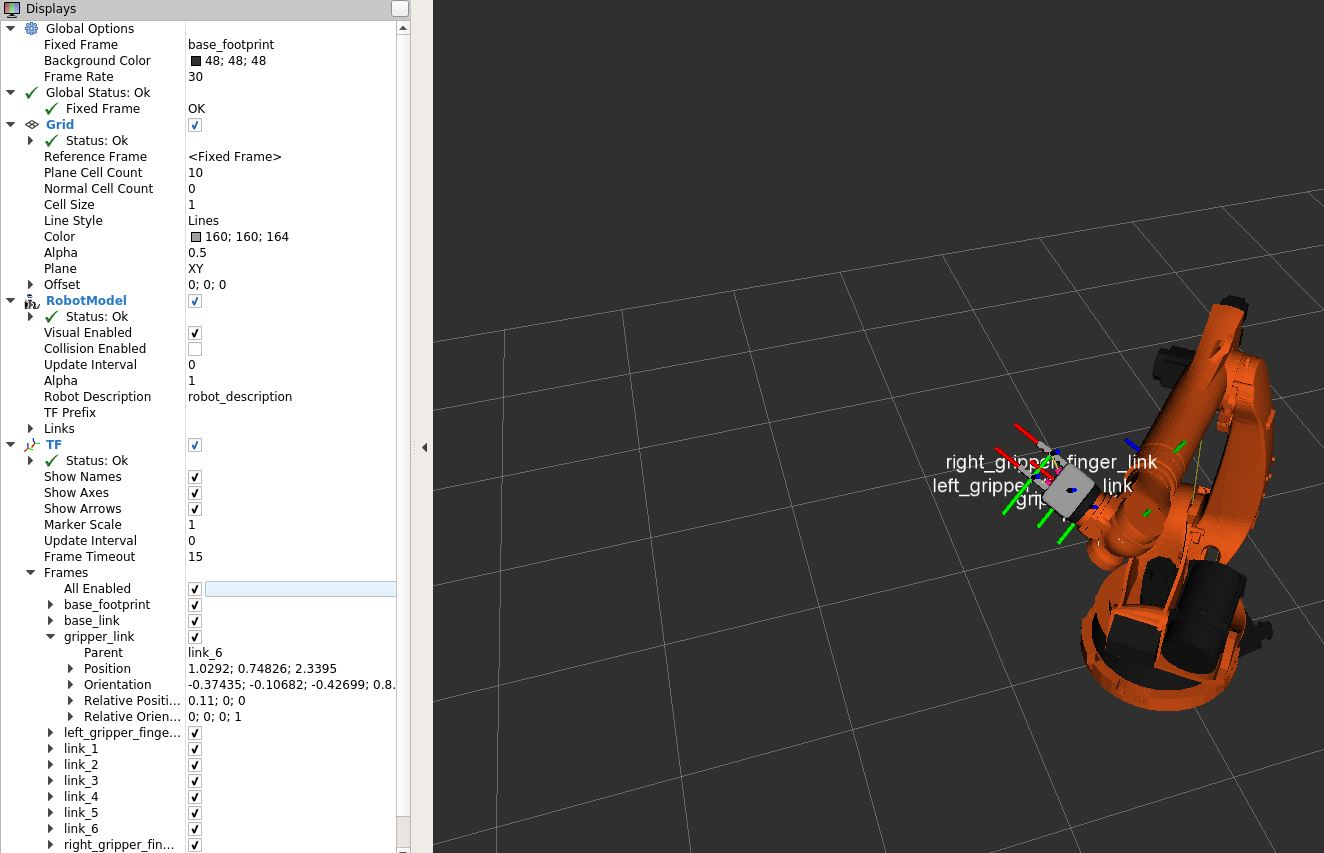

In [8]:
Image(filename='images/02-WC-Orientation.jpg')

In [28]:
gripper_quart_orien = [ -0.374355, -0.106821, -0.426987, 0.816168 ]

T0_G_cal = Matrix([[ 0.104, -0.891, -0.401,  0. ],
                   [ 0.732,  0.361, -0.681,  0. ],
                   [ 0.863, -0.182,  0.631,  0. ],
                   [ 0.   ,  0.   ,  0.   ,  1. ]])

T0_G_cal_corr = Matrix(T0_G_cal) * R_corr

In [29]:
print("\n")
print("T0_G_calculated_corrected = ", T0_G_cal_corr.evalf(subs=s))
print("\n")
print("T0_G_eval = ", T0_G_eval.evalf(subs=s))



T0_G_calculated_corrected =  Matrix([[-0.401000000000000, 0.891000000000000, 0.104000000000000, 0], [-0.681000000000000, -0.361000000000000, 0.732000000000000, 0], [0.631000000000000, 0.182000000000000, 0.863000000000000, 0], [0, 0, 0, 1.00000000000000]])


T0_G_eval =  Matrix([[-0.711583989308802, -0.0400277629511441, 0.590023626906618, -0.427153130281319], [0.283172944063179, -0.0434839837348605, -0.640343769227295, -0.478660932955177], [0.874404263766445, 0.127958772008632, 0.422953328673759, 2.38040686676407], [0, 0, 0, 1.00000000000000]])


# Calculate Wrist Center from Gripper with respect to base frame

In [30]:
#Extracting Gripper coordinates with respect to base frame from previous calculations
G0_coordinates = T0_G_cal_corr[0:3, 2:3]
# Assuming random position of the EE wrt to Base frame for calculation:
p = Matrix([ 1.6393, 0.068473, 0.82924])
WC = p - np.matrix(s[d7] * G0_coordinates)
WC

Matrix([
[ 1.607788],
[-0.153323],
[ 0.567751]])

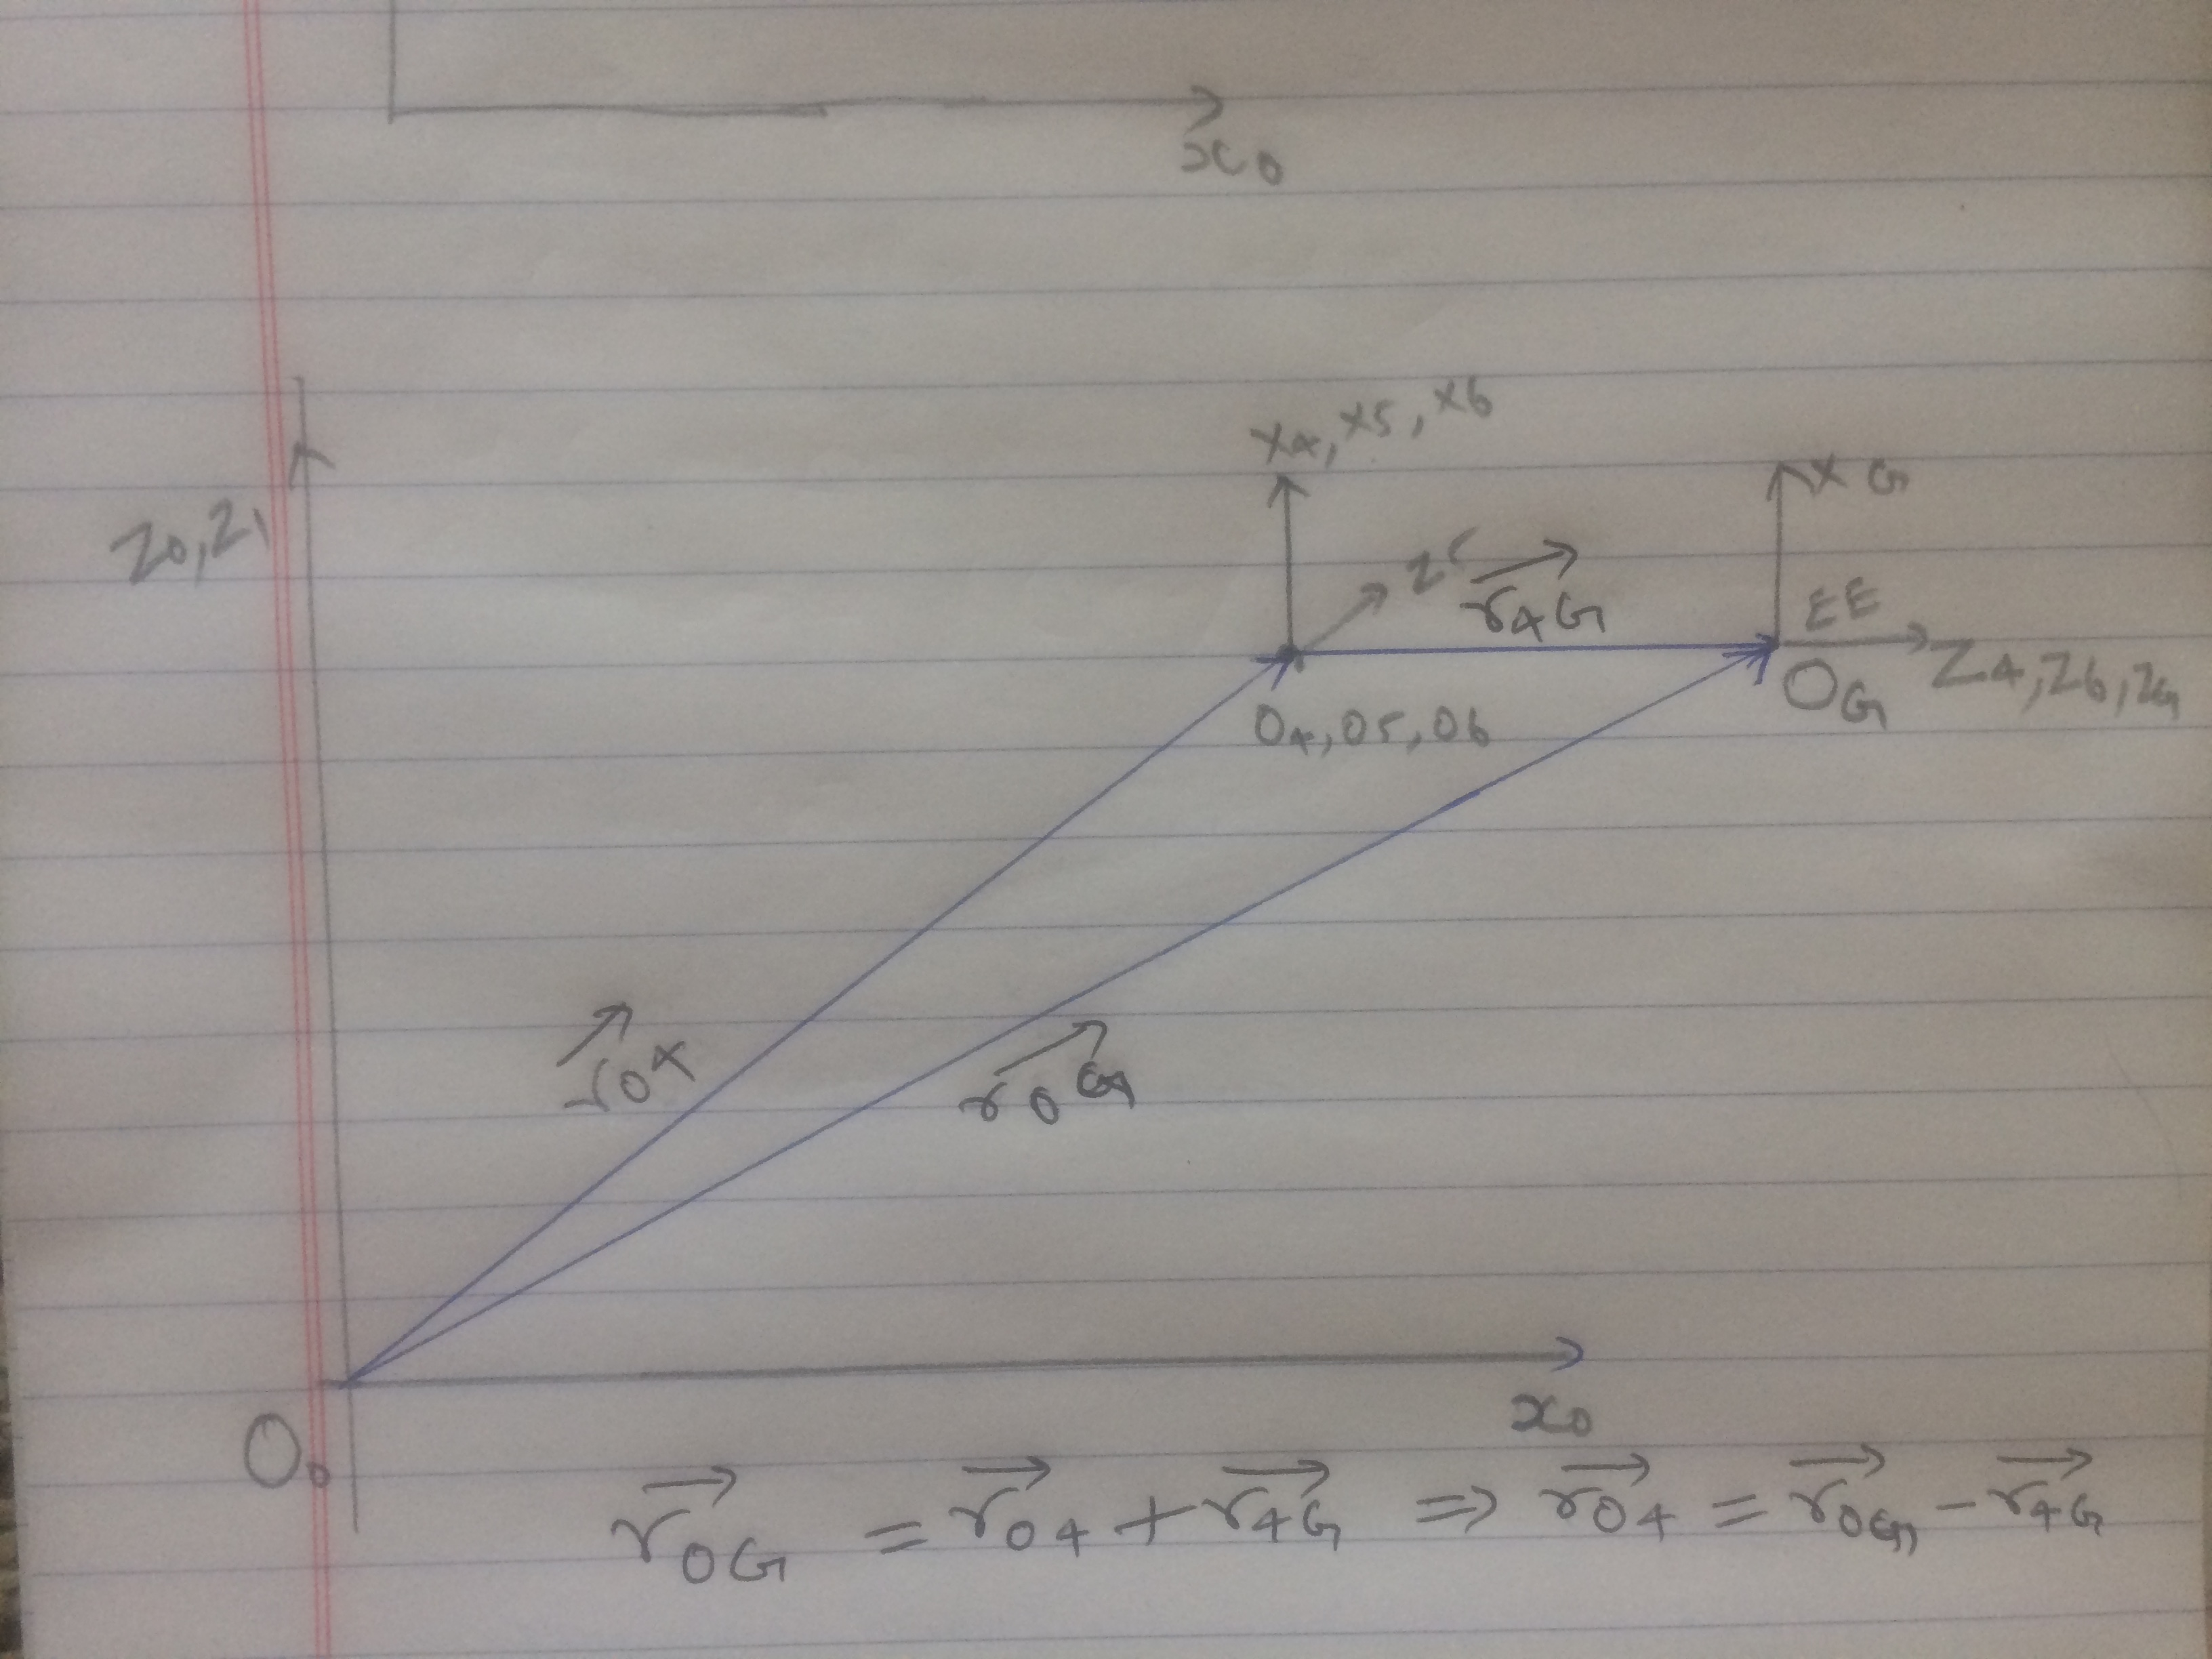

In [15]:
Image(filename='images/03-WC-ForwardKinematics.jpg')

# Working on Inverse Kinematics

In [16]:
import math
# generating new pose for joint variables
new_pose

{q1: -2.3, q2: 0.1, q3: -2.95, q4: 4.19, q5: -1.57, q6: -2.32}

Calculating theta1

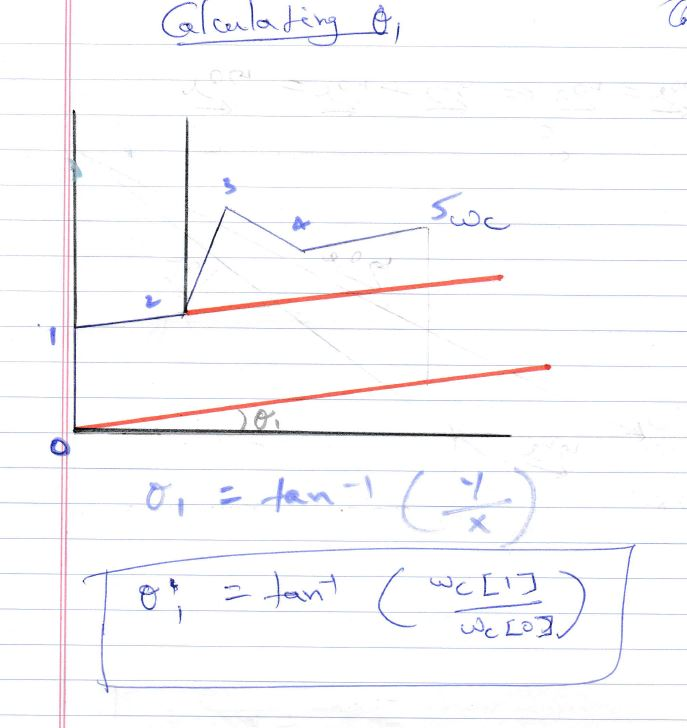

In [25]:
Image(filename='images/04-teeta1.jpg')

In [18]:
theta1 = math.atan2(WC[1], WC[0])
theta1

-0.07843483261223731

Calculating theta2

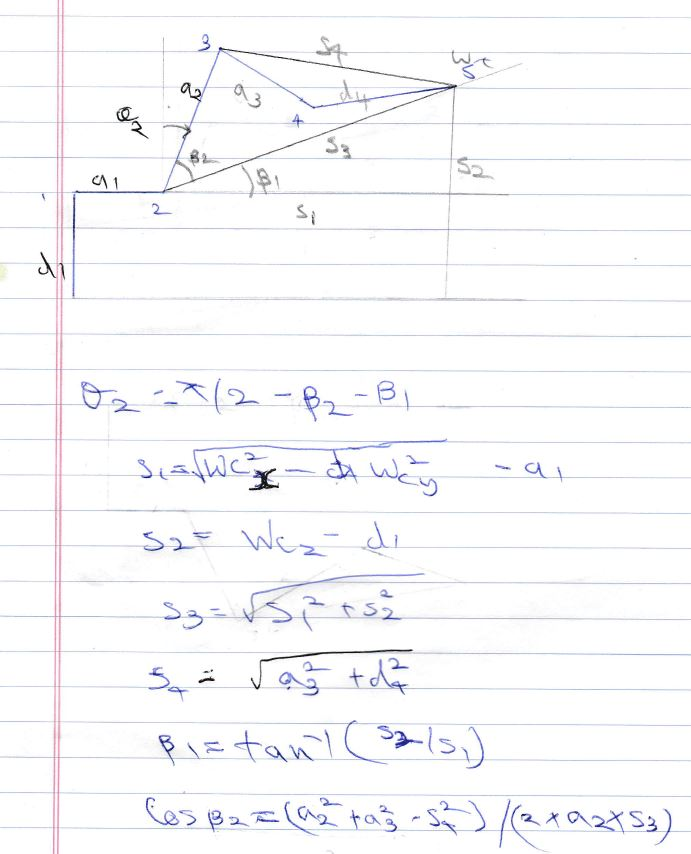

In [26]:
Image(filename='images/05-teeta2.jpg')

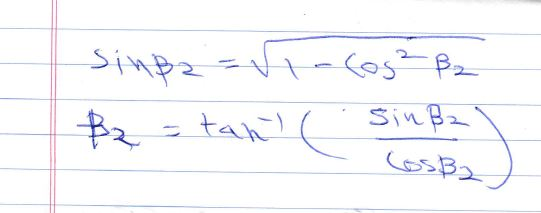

In [27]:
Image(filename='images/06-teeta2.jpg')

In [21]:
s1 = sqrt(WC[0]**2 + WC[1]**2) - s[a1]
s2 = WC[2] - s[d1]
s3 = sqrt(s1**2 + s2**2)
s4 = sqrt(s[a3]**2 + s[d4]**2)
beeta1 = math.atan2(s2, s1)

cos_beeta2 = (s[a2]**2 + s[a3]**2 - s4**2)/(2*s[a2]*s3)
sin_beeta2 = sqrt(1 - cos_beeta2**2)
beeta2 = math.atan2(sin_beeta2, cos_beeta2)

theta2 = (pi/2 - beeta1 - beeta2).evalf()
theta2

-0.0992008575452281

Calculating theta3

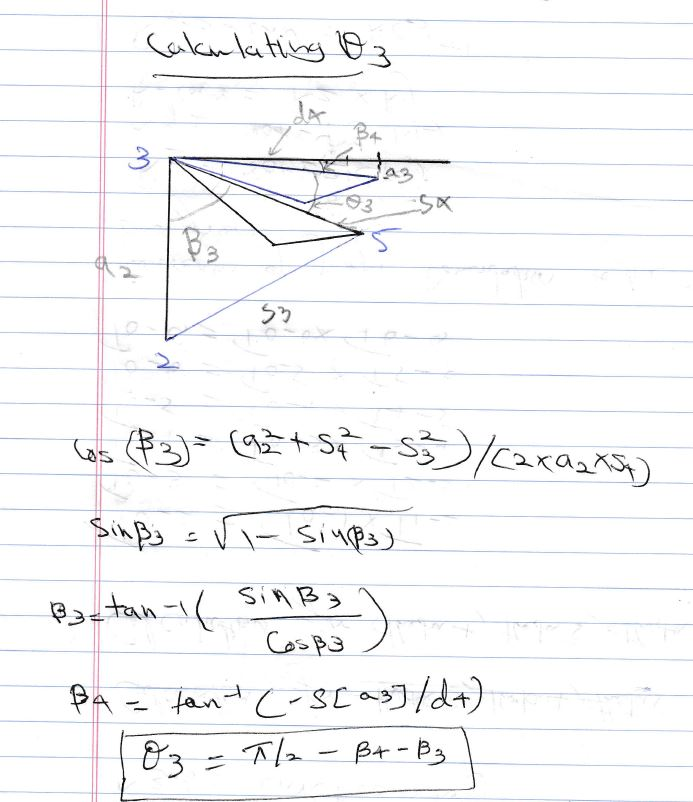

In [23]:
Image(filename='images/07-teeta3.jpg')

In [24]:
cos_beeta3 = (s[a2]**2 + s4**2 - s3**2)/(2*s[a2]*s4)
sin_beeta3 = sqrt(1 - cos_beeta3**2)
beeta3 = math.atan2(sin_beeta3, cos_beeta3)

beeta4 = math.atan2(-s[a3], s[d4])

theta3 = (pi/2 - beeta3 - beeta4).evalf()
theta3

0.589783826498024